In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [4]:
number_business = pd.read_csv("/home/wani/Downloads/number of businesses.csv", encoding="utf-8")
number_business.head()

,특성별(1),특성별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,특성별(1),특성별(2),사업체수 (개),비율 (%),사업체수 (개),비율 (%),사업체수 (개),비율 (%),사업체수 (개),비율 (%)
1,전체,소계,4310,100.0,4340,100.0,4471,100.0,4505,100.0
2,업종별,제조업용 로봇,525,12.2,558,12.6,565,12.6,568,12.6
3,업종별,전문서비스용 로봇,244,5.7,331,7.6,355,7.9,360,8.0
4,업종별,개인서비스용 로봇,106,2.5,127,2.9,161,3.6,161,3.6


In [5]:
number_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   특성별(1)  26 non-null     object
 1   특성별(2)  26 non-null     object
 2   2019    26 non-null     object
 3   2019.1  26 non-null     object
 4   2020    26 non-null     object
 5   2020.1  26 non-null     object
 6   2021    26 non-null     object
 7   2021.1  26 non-null     object
 8   2022    26 non-null     object
 9   2022.1  26 non-null     object
dtypes: object(10)
memory usage: 2.2+ KB


In [6]:
number_business

,특성별(1),특성별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,특성별(1),특성별(2),사업체수 (개),비율 (%),사업체수 (개),비율 (%),사업체수 (개),비율 (%),사업체수 (개),비율 (%)
1,전체,소계,4310,100.0,4340,100.0,4471,100.0,4505,100.0
2,업종별,제조업용 로봇,525,12.2,558,12.6,565,12.6,568,12.6
3,업종별,전문서비스용 로봇,244,5.7,331,7.6,355,7.9,360,8.0
4,업종별,개인서비스용 로봇,106,2.5,127,2.9,161,3.6,161,3.6
5,업종별,로봇부품 및 소프트웨어,1360,31.6,1411,32.5,1419,31.7,1420,31.5
6,업종별,로봇 시스템,742,17.2,612,14.1,644,14.4,649,14.4
7,업종별,로봇 임베디드,158,3.7,164,3.8,171,3.8,179,4.0
8,업종별,로봇 서비스,1175,27.3,1137,26.2,1156,25.9,1168,25.9
9,매출액별,1억원 미만,692,16.1,830,19.1,780,17.4,1017,22.6


In [6]:
# 데이터 생성 (업종 / 연도별 사업체 수)
data_business = {
    '업종': ['제조업용 로봇', '전문서비스용 로봇', '개인서비스용 로봇', '로봇부품 및 소프트웨어', '로봇 시스템', '로봇 임베디드', '로봇 서비스'],
    '2019': [525, 244, 106, 1360, 742, 158, 1175],
    '2020': [558, 331, 127, 1411, 612, 164, 1137],
    '2021': [565, 355, 161, 1419, 644, 171, 1156],
    '2022': [568, 360, 161, 1420, 649, 179, 1168]
}

In [7]:
df_business = pd.DataFrame(data_business)

In [8]:
df_business

,업종,2019,2020,2021,2022
0,제조업용 로봇,525,558,565,568
1,전문서비스용 로봇,244,331,355,360
2,개인서비스용 로봇,106,127,161,161
3,로봇부품 및 소프트웨어,1360,1411,1419,1420
4,로봇 시스템,742,612,644,649
5,로봇 임베디드,158,164,171,179
6,로봇 서비스,1175,1137,1156,1168


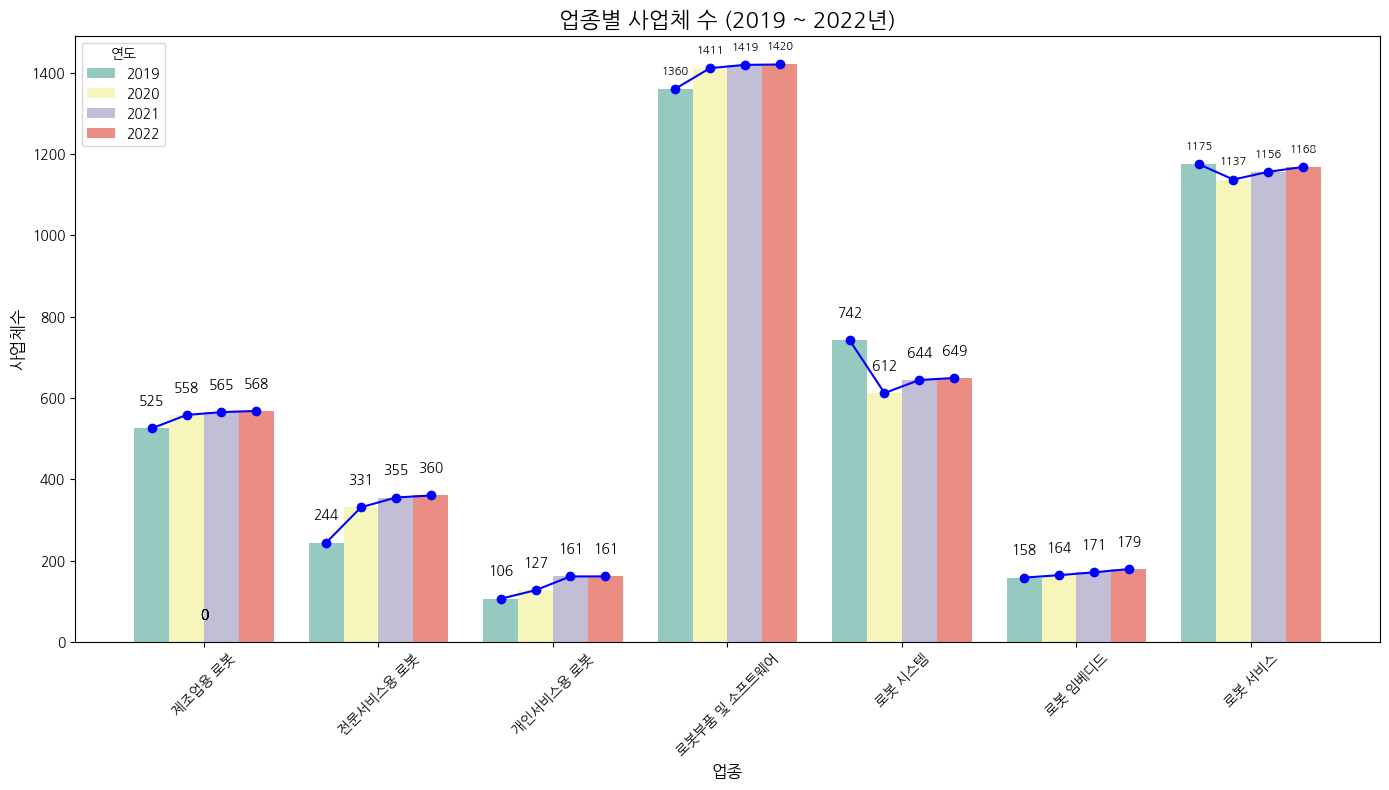

In [9]:
# 데이터 변환
df_business_melted = pd.melt(df_business, id_vars='업종', value_vars=['2019', '2020', '2021', '2022'], 
                    var_name='연도', value_name='사업체수')

# 그래프 크기 설정
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='업종', y='사업체수', hue='연도', data=df_business_melted, palette='Set3')

# 각 업종별로 막대 그래프 위에 인원수 추가
for bar in bar_plot.patches:
    # 막대의 높이와 x좌표를 가져옵니다.
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2  # 막대의 중앙 x좌표

    # 4자리 숫자인 경우와 그렇지 않은 경우의 간격 조정
    if height >= 1000:
        plt.text(x_position, height + 30, int(height), ha='center', va='bottom', fontsize=8)
    else:
        plt.text(x_position, height + 50, int(height), ha='center', va='bottom', fontsize=10)

# 각 업종별로 막대그래프 위에 꺾은선 그래프 추가
for idx, 업종 in enumerate(df_business['업종']):
    # 각 업종에 해당하는 데이터를 추출하여 꺾은선 그래프 그리기
    df_filtered = df_business[df_business['업종'] == 업종].melt(id_vars='업종', value_vars=['2019', '2020', '2021', '2022'], 
                                                var_name='연도', value_name='사업체수')

    # x축을 동일한 위치로 하기 위해서 막대 그래프의 각 업종 위치에 맞게 겹치도록 설정
    x_positions = [idx - 0.3, idx - 0.1, idx + 0.1, idx + 0.3]

    # 꺾은선 그래프 그리기 (막대 그래프 위에)
    plt.plot(x_positions, df_filtered['사업체수'], marker='o', color='blue')

# 그래프 제목 및 레이블 설정
plt.title('업종별 사업체 수 (2019 ~ 2022년)', fontsize=16)
plt.xlabel('업종', fontsize=12)
plt.ylabel('사업체수', fontsize=12)
plt.xticks(rotation=45)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

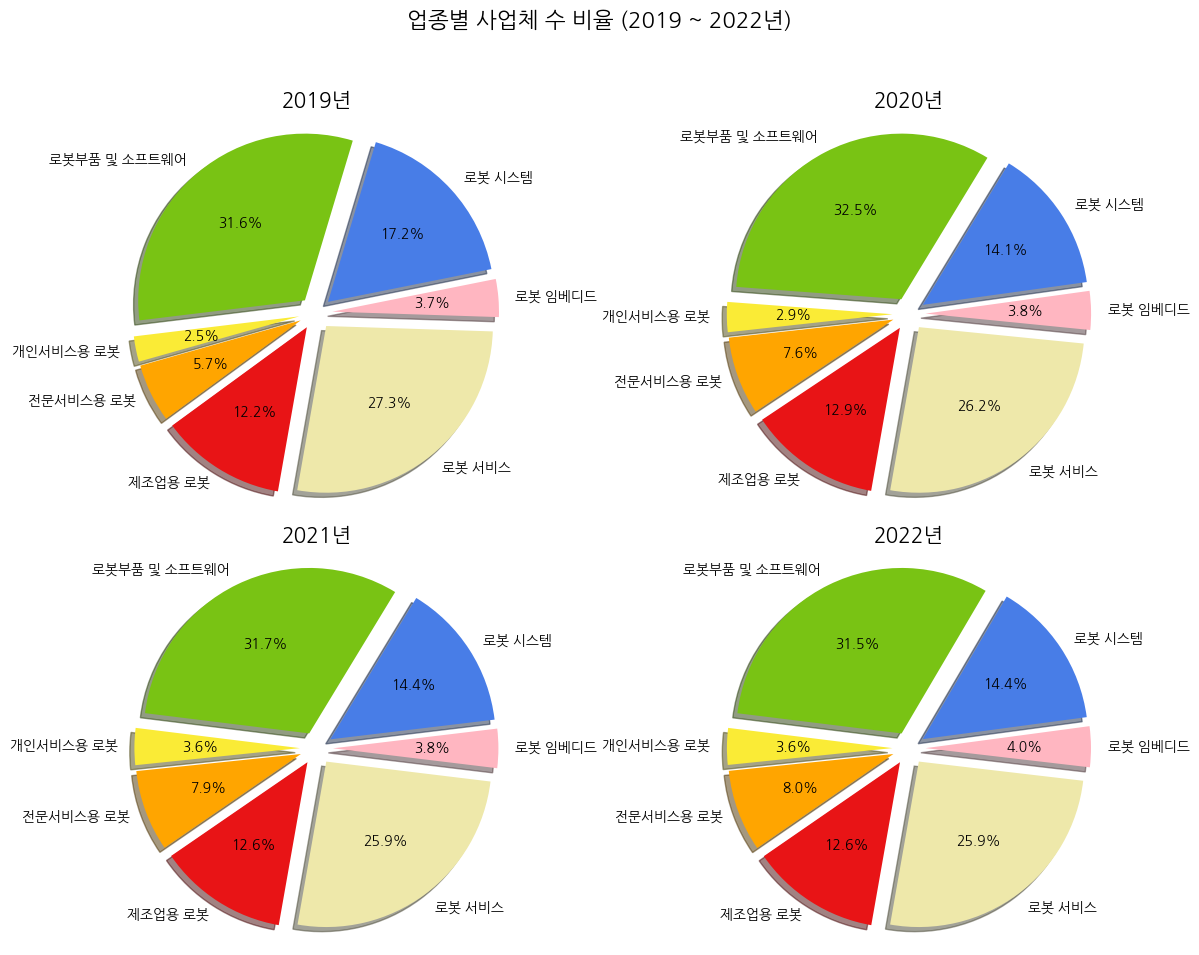

In [10]:
# 파이차트 그리기
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 배열의 서브플롯 생성
fig.suptitle('업종별 사업체 수 비율 (2019 ~ 2022년)', fontsize=16)
explode = [0.1] * len(df_business)  # 업종 수에 맞게 explode 리스트 생성
colors = ['#e81416', '#ffa500', '#faeb36', '#79c314', '#487de7', '#FFB6C1', '#EEE8AA', '#b0c4de']

# 각 연도에 대해 파이차트 생성
for i, year in enumerate(['2019', '2020', '2021', '2022']):
    ax = axs[i // 2, i % 2]  # 2x2 배열에서 위치 지정
    ax.pie(df_business[year], labels=df_business['업종'], autopct='%1.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
    ax.set_title(f'{year}년', fontsize=15)
    ax.axis('equal')  # 원형 유지

# 레이아웃 조정 및 그래프 출력
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 공간 조정
plt.show()

In [7]:
# 데이터 생성 (매출액 / 연도별 사업체 수)
data_revenue = {
    '매출액': ['1억원 미만', '1~5억원 미만', '5~10억원 미만', '1~10억원 미만', '10~30억원 이상', '30억원 이상', '10~50억원 미만', '50~100억원 미만', '100억원 이상'],
    '2019': [692, 1072, 948, np.nan, 1030, 568, np.nan, np.nan, np.nan],
    '2020': [830, 1435, 705, np.nan, 823, 547, np.nan, np.nan, np.nan],
    '2021': [780, np.nan, np.nan, 2243, np.nan, np.nan, 1171, 142, 136],
    '2022': [1017, np.nan, np.nan, 2005, np.nan, np.nan, 1159, 180, 144]
}

In [8]:
df_revenue = pd.DataFrame(data_revenue)

In [9]:
df_revenue

,매출액,2019,2020,2021,2022
0,1억원 미만,692.0,830.0,780.0,1017.0
1,1~5억원 미만,1072.0,1435.0,NaN,NaN
2,5~10억원 미만,948.0,705.0,NaN,NaN
3,1~10억원 미만,NaN,NaN,2243.0,2005.0
4,10~30억원 이상,1030.0,823.0,NaN,NaN
5,30억원 이상,568.0,547.0,NaN,NaN
6,10~50억원 미만,NaN,NaN,1171.0,1159.0
7,50~100억원 미만,NaN,NaN,142.0,180.0
8,100억원 이상,NaN,NaN,136.0,144.0


In [14]:
df_revenue.fillna(0, inplace=True)

In [15]:
df_revenue

,매출액,2019,2020,2021,2022
0,1억원 미만,692.0,830.0,780.0,1017.0
1,1~5억원 미만,1072.0,1435.0,0.0,0.0
2,5~10억원 미만,948.0,705.0,0.0,0.0
3,1~10억원 미만,0.0,0.0,2243.0,2005.0
4,10~30억원 이상,1030.0,823.0,0.0,0.0
5,30억원 이상,568.0,547.0,0.0,0.0
6,10~50억원 미만,0.0,0.0,1171.0,1159.0
7,50~100억원 미만,0.0,0.0,142.0,180.0
8,100억원 이상,0.0,0.0,136.0,144.0


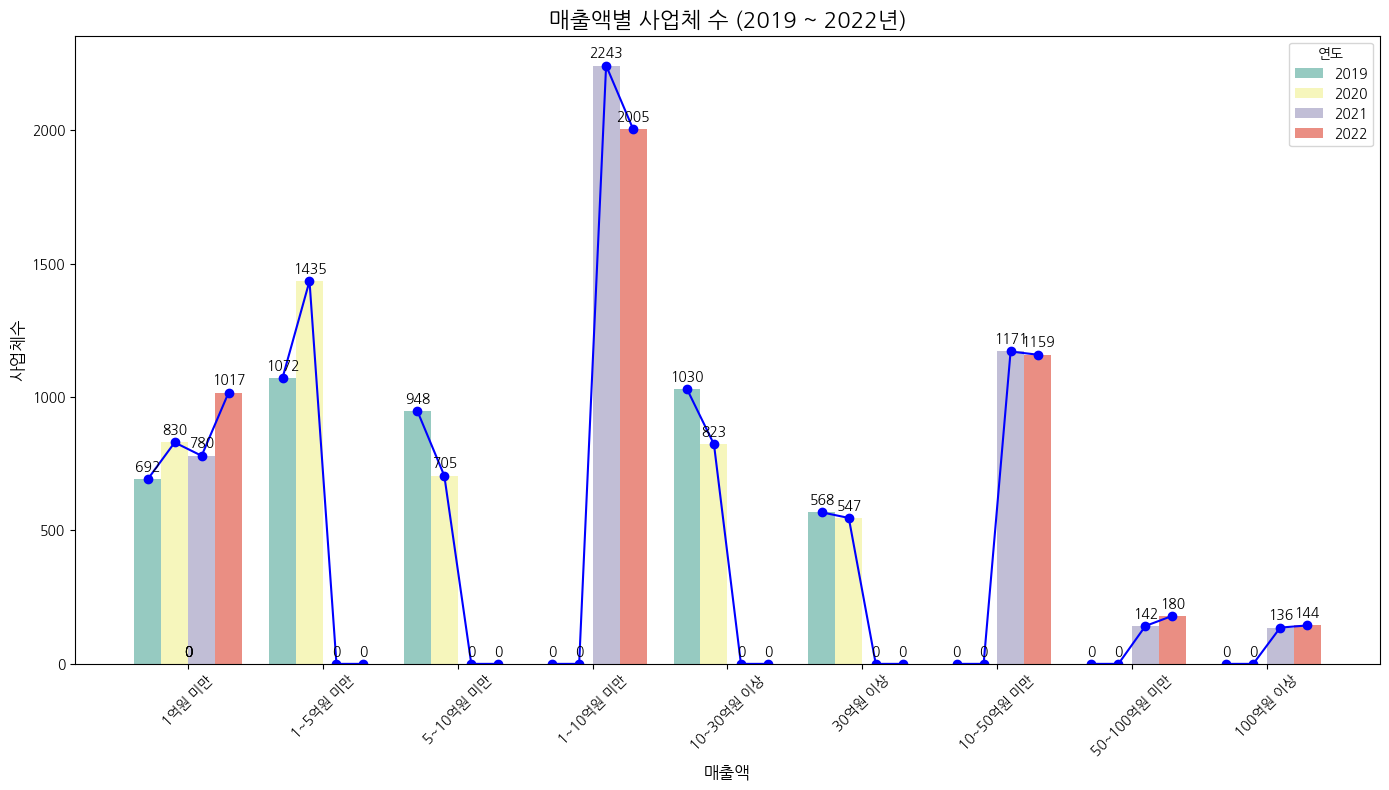

In [16]:
# 데이터 변환
df_revenue_melted = pd.melt(df_revenue, id_vars='매출액', value_vars=['2019', '2020', '2021', '2022'], 
                               var_name='연도', value_name='사업체수')

# 그래프 크기 설정
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='매출액', y='사업체수', hue='연도', data=df_revenue_melted, palette='Set3')

# 각 매출액별로 막대 그래프 위에 사업체 수 추가
for bar in bar_plot.patches:
    # 막대의 높이와 x좌표를 가져옵니다.
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2 # 막대의 중앙 x좌표
    # 각 막대 위에 텍스트 추가
    plt.text(x_position, height + 20, int(height), ha='center', va='bottom')

# 각 매출액별로 막대그래프 위에 꺾은선 그래프 추가
for idx, 매출액 in enumerate(df_revenue['매출액']):
    # 각 매출액에 해당하는 데이터를 추출하여 꺾은선 그래프 그리기
    df_filtered = df_revenue[df_revenue['매출액'] == 매출액].melt(id_vars='매출액', value_vars=['2019', '2020', '2021', '2022'], 
                                                var_name='연도', value_name='사업체수')

    # x축을 동일한 위치로 하기 위해서 막대 그래프의 각 업종 위치에 맞게 겹치도록 설정
    x_positions = [idx - 0.3, idx - 0.1, idx + 0.1, idx + 0.3]

    # 꺾은선 그래프 그리기 (막대 그래프 위에)
    plt.plot(x_positions, df_filtered['사업체수'], marker='o', color='blue')

# 그래프 제목 및 레이블 설정
plt.title('매출액별 사업체 수 (2019 ~ 2022년)', fontsize=16)
plt.xlabel('매출액', fontsize=12)
plt.ylabel('사업체수', fontsize=12)
plt.xticks(rotation=45)

# 범례 추가
plt.legend(title='연도')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

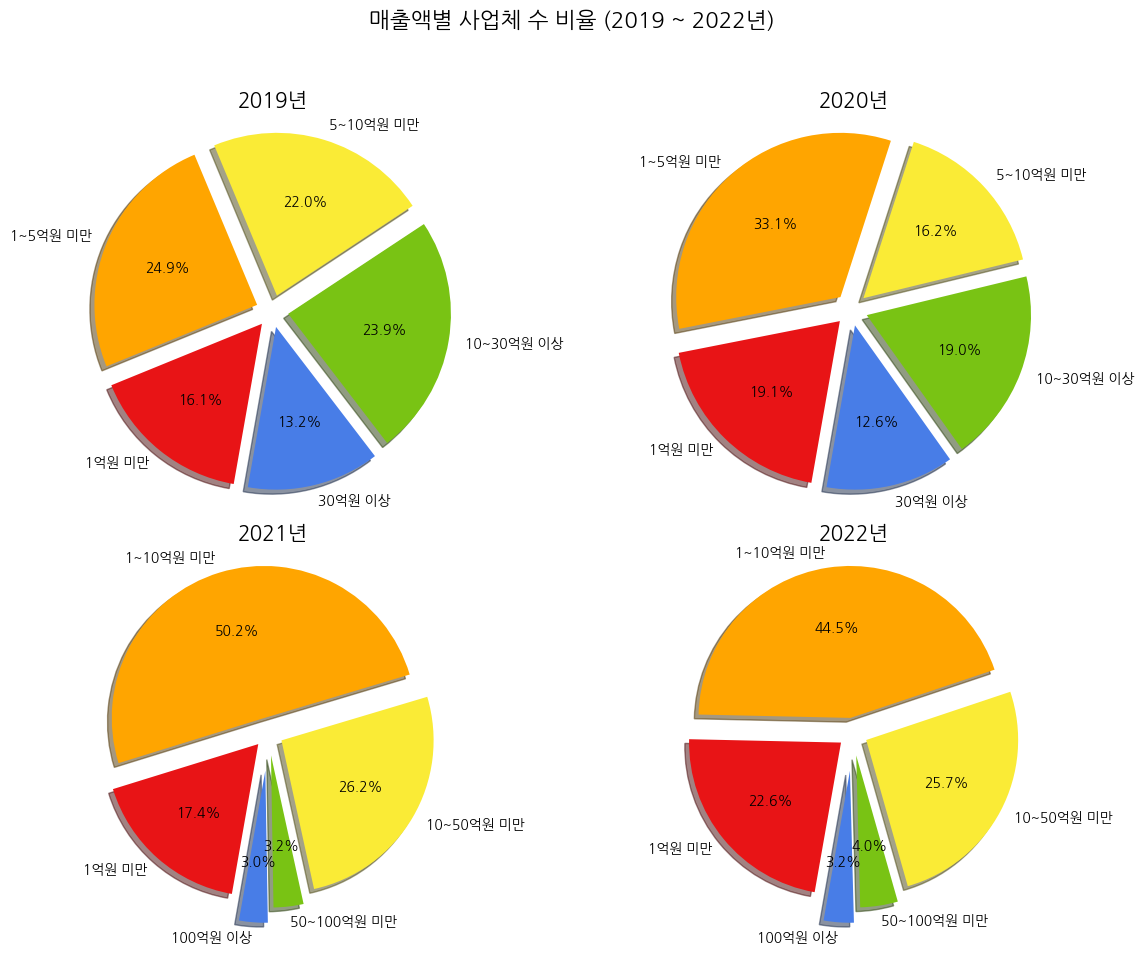

In [27]:
# 0 값 제외한 데이터만 필터링하는 함수
def filter_zero_values(df, year):
    filtered_df = df[df[year] > 0]  # 해당 연도의 0 이상 값만 필터링
    return filtered_df

# 파이차트 그리기
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 배열의 서브플롯 생성
fig.suptitle('매출액별 사업체 수 비율 (2019 ~ 2022년)', fontsize=16)
colors = ['#e81416', '#ffa500', '#faeb36', '#79c314', '#487de7']

# 0 값을 제외한 라벨 표시 함수
def func(pct, allvalues):
    absolute = int(np.round(pct / 100. * np.sum(allvalues)))
    return f'{pct:.1f}%' if absolute > 0 else ''  # 0인 경우 빈 문자열 반환

# 각 연도에 대해 파이차트 생성
for i, year in enumerate(['2019', '2020', '2021', '2022']):
     # 2021년과 2022년의 특정 섹션 간격을 더 벌리기 위해 explode 설정을 다르게
    if year == '2021':
        explode = [0.1, 0.1, 0.1, 0.15, 0.25]  # 100억원 이상과 50~100억원 미만 부분 간격 조정
    elif year == '2022':
        explode = [0.1, 0.1, 0.1, 0.15, 0.25]  # 동일하게 조정
    else:
        explode = [0.1] * len(df_revenue['매출액'])  # 다른 해는 기본 explode
    
    # 0 값 제외한 데이터 필터링

    # 0 값 제외한 데이터 필터링
    filtered_data = filter_zero_values(df_revenue, year)
    
    # explode 리스트 크기를 필터링된 데이터에 맞추기
    explode_filtered = explode[:len(filtered_data)]
    
    # 필터링된 데이터로 파이차트 그리기
    ax = axs[i // 2, i % 2]  # 2x2 배열에서 위치 지정
    ax.pie(filtered_data[year], labels=filtered_data['매출액'], autopct=lambda pct: func(pct, filtered_data[year]), startangle=260, counterclock=False, explode=explode_filtered, shadow=True, colors=colors)
    ax.set_title(f'{year}년', fontsize=15)
    ax.axis('equal')  # 원형 유지

# 레이아웃 조정 및 그래프 출력
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 공간 조정
plt.show()

In [18]:
# 데이터 생성 (종사자수 / 연도별 사업체 수)
data_employees = {
    '종사자수': ['1~4인', '5~9인', '10~49인', '50인 이상'],
    '2019': [1321, 678, 1827, 484],
    '2020': [1674, 1268, 1163, 235],
    '2021': [1928, 1220, 1075, 248],
    '2022': [2085, 982, 1189, 250],
}

In [19]:
df_employees = pd.DataFrame(data_employees)

In [20]:
df_employees

,종사자수,2019,2020,2021,2022
0,1~4인,1321,1674,1928,2085
1,5~9인,678,1268,1220,982
2,10~49인,1827,1163,1075,1189
3,50인 이상,484,235,248,250


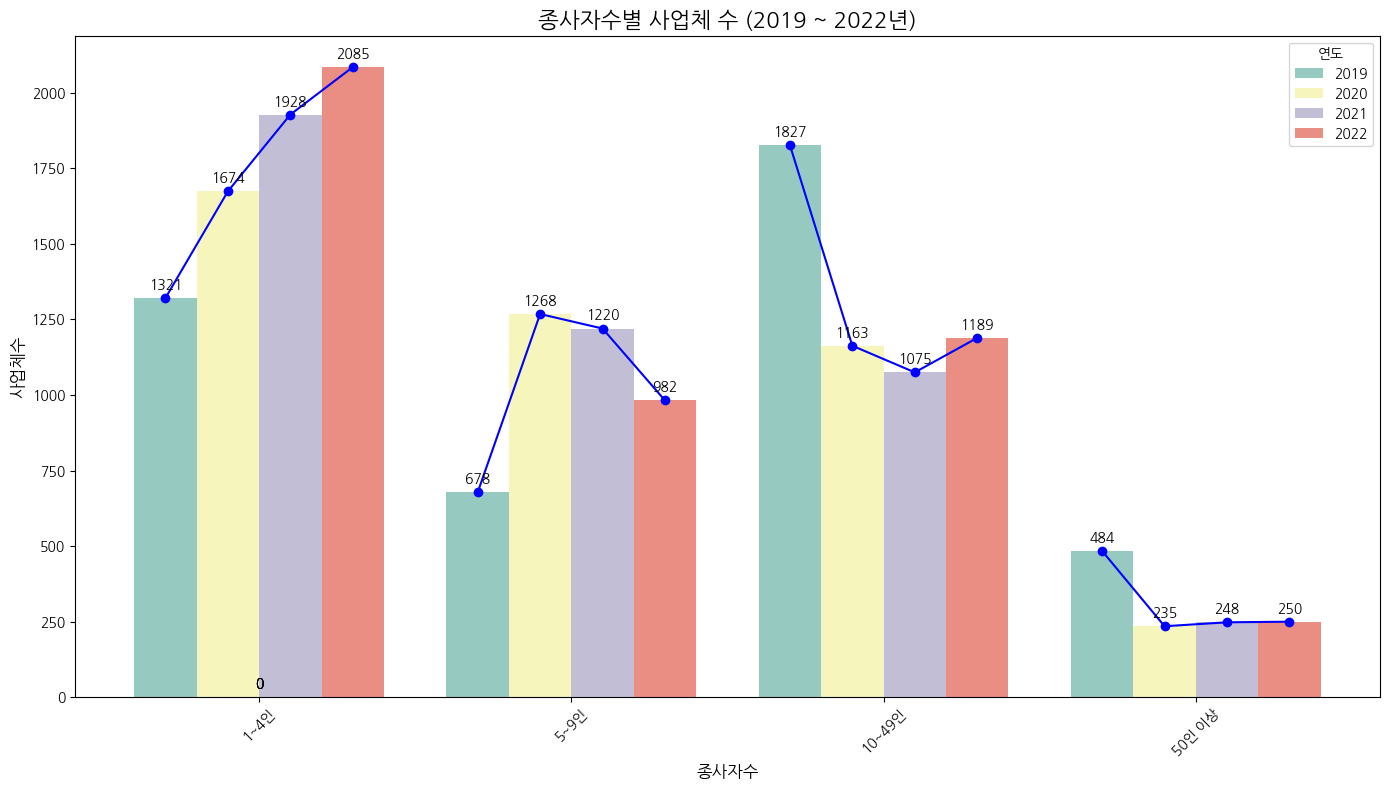

In [21]:
# 데이터 변환
df_employees_melted = pd.melt(df_employees, id_vars='종사자수', value_vars=['2019', '2020', '2021', '2022'], 
                               var_name='연도', value_name='사업체수')

# 그래프 크기 설정
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='종사자수', y='사업체수', hue='연도', data=df_employees_melted, palette='Set3')

# 각 종사자수별로 막대 그래프 위에 사업체 수 추가
for bar in bar_plot.patches:
    # 막대의 높이와 x좌표를 가져옵니다.
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2 # 막대의 중앙 x좌표
    # 각 막대 위에 텍스트 추가
    plt.text(x_position, height + 20, int(height), ha='center', va='bottom')

# 각 종사자수별로 막대그래프 위에 꺾은선 그래프 추가
for idx, 종사자수 in enumerate(df_employees['종사자수']):
    # 각 종사자수에 해당하는 데이터를 추출하여 꺾은선 그래프 그리기
    df_filtered = df_employees[df_employees['종사자수'] == 종사자수].melt(id_vars='종사자수', value_vars=['2019', '2020', '2021', '2022'], 
                                                var_name='연도', value_name='사업체수')

    # x축을 동일한 위치로 하기 위해서 막대 그래프의 각 업종 위치에 맞게 겹치도록 설정
    x_positions = [idx - 0.3, idx - 0.1, idx + 0.1, idx + 0.3]

    # 꺾은선 그래프 그리기 (막대 그래프 위에)
    plt.plot(x_positions, df_filtered['사업체수'], marker='o', color='blue')

# 그래프 제목 및 레이블 설정
plt.title('종사자수별 사업체 수 (2019 ~ 2022년)', fontsize=16)
plt.xlabel('종사자수', fontsize=12)
plt.ylabel('사업체수', fontsize=12)
plt.xticks(rotation=45)

# 범례 추가
plt.legend(title='연도')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

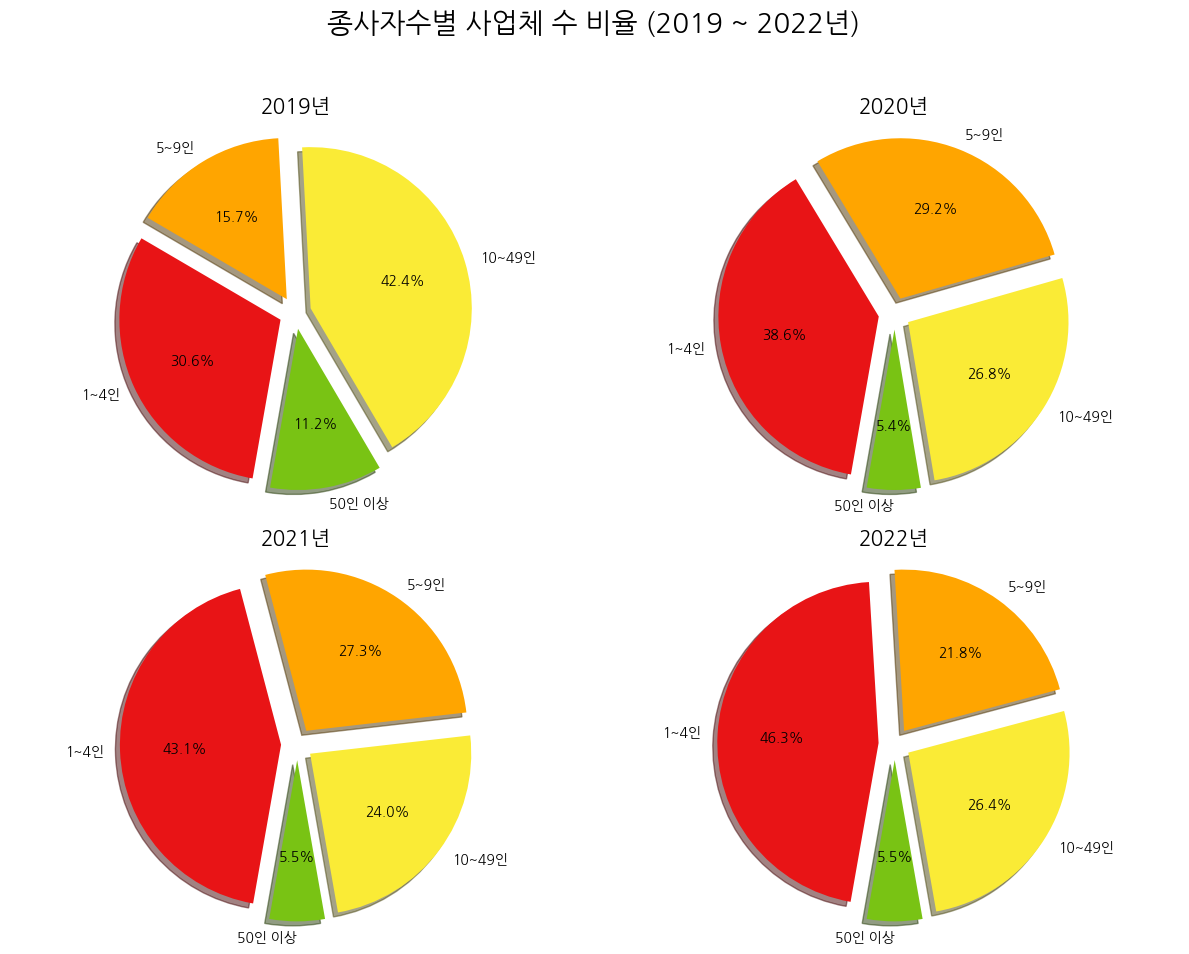

In [22]:
# 파이차트 그리기
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 배열의 서브플롯 생성
fig.suptitle('종사자수별 사업체 수 비율 (2019 ~ 2022년)', fontsize=20)
explode = [0.1] * len(data_employees['종사자수'])  # explode 리스트 크기를 데이터에 맞추기
colors = ['#e81416', '#ffa500', '#faeb36', '#79c314']

# 각 연도에 대해 파이차트 생성
for i, year in enumerate(['2019', '2020', '2021', '2022']):
    ax = axs[i // 2, i % 2]  # 2x2 배열에서 위치 지정
    ax.pie(df_employees[year], labels=df_employees['종사자수'], autopct=lambda pct: func(pct, df_revenue[year]), startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
    ax.set_title(f'{year}년', fontsize=15)
    ax.axis('equal')  # 원형 유지

# 레이아웃 조정 및 그래프 출력
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 공간 조정
plt.show()

In [23]:
# 데이터 생성 (권역 / 연도별 사업체 수)
data_region = {
    '권역': ['수도권', '영남권', '충청권', '호남권'],
    '2019': [2762, 1106, 306, 136],
    '2020': [2116, 1433, 481, 310],
    '2021': [2248, 1423, 502, 298],
    '2022': [2366, 1399, 511, 229]
}

In [24]:
df_region = pd.DataFrame(data_region)

In [25]:
df_region

,권역,2019,2020,2021,2022
0,수도권,2762,2116,2248,2366
1,영남권,1106,1433,1423,1399
2,충청권,306,481,502,511
3,호남권,136,310,298,229


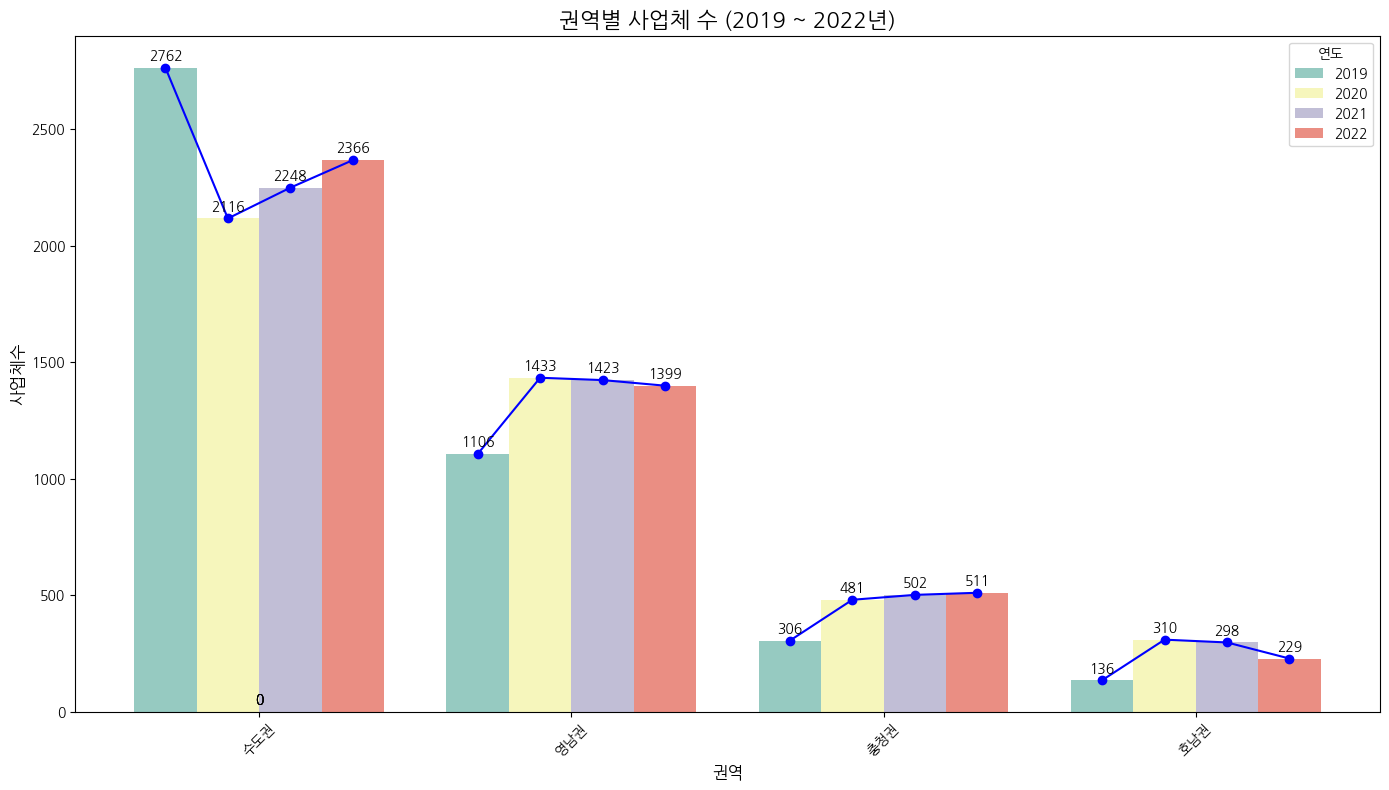

In [26]:
# 데이터 변환
df_region_melted = pd.melt(df_region, id_vars='권역', value_vars=['2019', '2020', '2021', '2022'], 
                               var_name='연도', value_name='사업체수')

# 그래프 크기 설정
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='권역', y='사업체수', hue='연도', data=df_region_melted, palette='Set3')

# 각 권역별로 막대 그래프 위에 사업체 수 추가
for bar in bar_plot.patches:
    # 막대의 높이와 x좌표를 가져옵니다.
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2 # 막대의 중앙 x좌표
    # 각 막대 위에 텍스트 추가
    plt.text(x_position, height + 20, int(height), ha='center', va='bottom')

# 각 권역별로 막대그래프 위에 꺾은선 그래프 추가
for idx, 권역 in enumerate(df_region['권역']):
    # 각 권역에 해당하는 데이터를 추출하여 꺾은선 그래프 그리기
    df_filtered = df_region[df_region['권역'] == 권역].melt(id_vars='권역', value_vars=['2019', '2020', '2021', '2022'], 
                                                var_name='연도', value_name='사업체수')

    # x축을 동일한 위치로 하기 위해서 막대 그래프의 각 업종 위치에 맞게 겹치도록 설정
    x_positions = [idx - 0.3, idx - 0.1, idx + 0.1, idx + 0.3]

    # 꺾은선 그래프 그리기 (막대 그래프 위에)
    plt.plot(x_positions, df_filtered['사업체수'], marker='o', color='blue')

# 그래프 제목 및 레이블 설정
plt.title('권역별 사업체 수 (2019 ~ 2022년)', fontsize=16)
plt.xlabel('권역', fontsize=12)
plt.ylabel('사업체수', fontsize=12)
plt.xticks(rotation=45)

# 범례 추가
plt.legend(title='연도')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

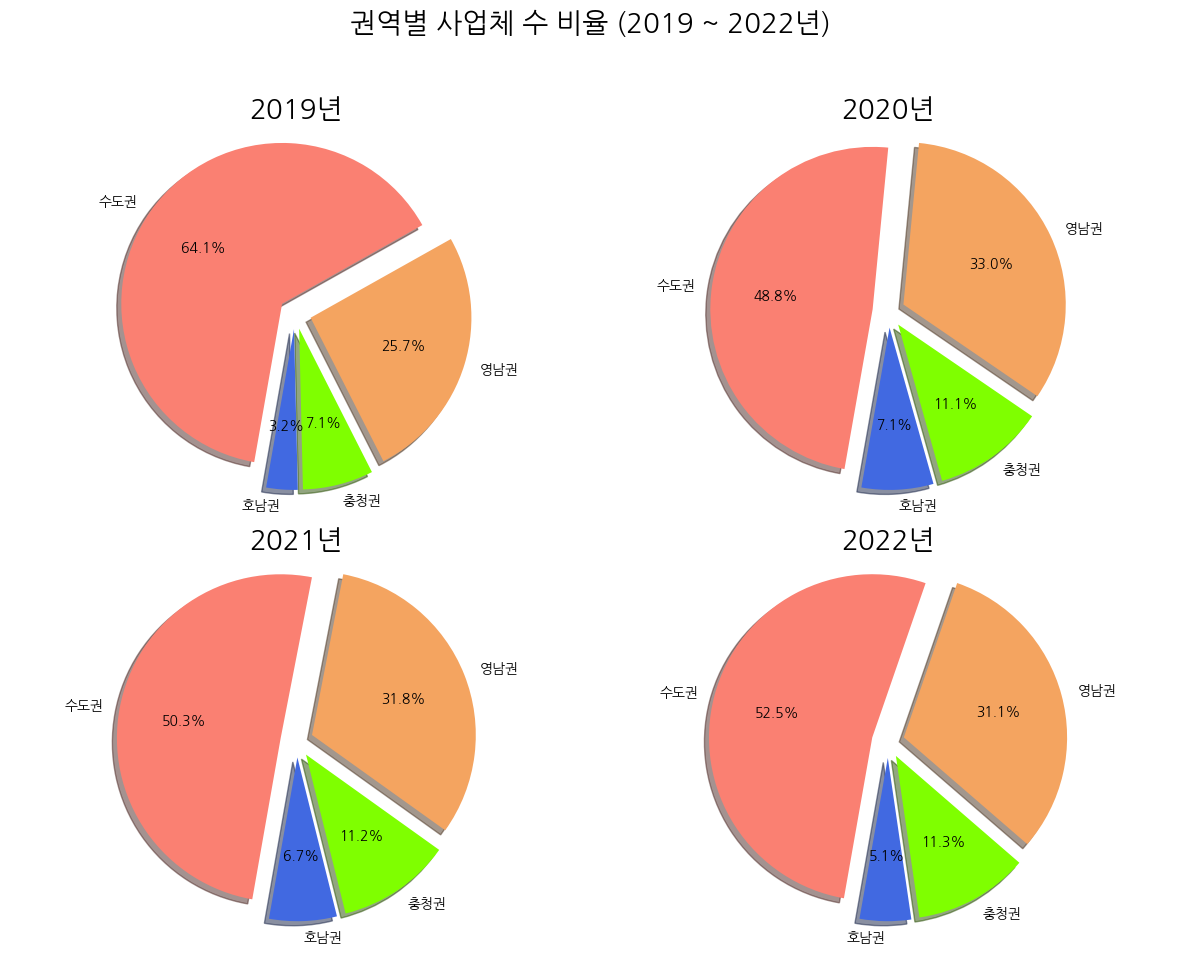

In [27]:
# 파이차트 그리기
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 배열의 서브플롯 생성
fig.suptitle('권역별 사업체 수 비율 (2019 ~ 2022년)', fontsize=20)
explode = [0.1] * len(data_region['권역'])  # explode 리스트 크기를 데이터에 맞추기
colors = ['#FA8072', '#F4A460', '#7FFF00', '#4169E1']

# 각 연도에 대해 파이차트 생성
for i, year in enumerate(['2019', '2020', '2021', '2022']):
    ax = axs[i // 2, i % 2]  # 2x2 배열에서 위치 지정
    ax.pie(df_region[year], labels=df_region['권역'], autopct=lambda pct: func(pct, df_revenue[year]), startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
    ax.set_title(f'{year}년', fontsize=20)
    ax.axis('equal')  # 원형 유지

# 레이아웃 조정 및 그래프 출력
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 공간 조정
plt.show()